In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rdkit
import mordred
from mordred import descriptors

In [56]:
df = pd.read_csv("data/AqSolDB_Standardized.csv")
df.head()

,SMILES,Standardized_SMILES,LogS
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127
1,O=C1Nc2cccc3cccc1c23,O=C1Nc2cccc3cccc1c23,-3.254767
2,Clc1ccc(C=O)cc1,O=Cc1ccc(Cl)cc1,-2.177078
3,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409
4,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065


In [57]:
calc = mordred.Calculator(descriptors, ignore_3D=True)
mols = [rdkit.Chem.MolFromSmiles(smi) for smi in df["Standardized_SMILES"]]
mols = calc.pandas(mols=mols)

[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] Unusual charge on atom 1 number of radical electrons set to zero
[15:39:34] Unusual charge on atom 0 number of radical electrons set to zero
[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] Unusual charge on atom 1 number of radical electrons set to zero
[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] WARNING: not removing hydrogen atom without neighbors
[15:39:34] WARNING: not removing hydrogen atom without ne

/Users/aaryanjaitly/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/aaryanjaitly/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/aaryanjaitly/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/aaryanjaitly/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 118/9982 [00:04<06:56, 23.68it/s]

/Users/aaryanjaitly/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/aaryanjaitly/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  2%|▏         | 158/9982 [00:05<03:08, 52.05it/s]

/Users/aaryanjaitly/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  2%|▏         | 233/9982 [00:08<05:29, 29.56it/s]

/Users/aaryanjaitly/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  3%|▎         | 282/9982 [00:10<05:07, 31.59it/s][15:39:46] WARNING: not removing hydrogen atom without neighbors
[15:39:46] WARNING: not removing hydrogen atom without neighbors
[15:39:46] WARNING: not removing hydrogen atom without neighbors
  4%|▎         | 352/9982 [00:11<04:40, 34.30it/s][15:39:48] Unusual charge on atom 1 number of radical electrons set to zero
[15:39:48] Unusual charge on atom 1 number of radical electrons set to zero
[15:39:48] Unusual charge on atom 1 number of radical electrons set to zero
  4%|▍         | 397/9982 [00:12<04:24, 36.18it/s][15:39:49] Unusual charge on atom 0 number of radical electrons set to zero
[15:39:49] Unusual charge on atom 0 number of radical electrons set to zero
[15:39:49] Unusual charge on atom 0 number of radical electrons set to zero
[15:39:49] WARNING: not removing hydrogen atom without neighbors
[15:39:49] WARNING: not removing hydrogen atom without neighbors
[15:39:49] WARNING: not removing hydrogen atom without neighbors
[15:

In [58]:
mols = mols.apply(pd.to_numeric, errors='coerce')

In [59]:
mols.shape

(9982, 1613)

In [60]:
df_descriptors = pd.concat([df,mols],axis=1)

In [61]:
df_descriptors.shape

(9982, 1616)

In [62]:
df_descriptors.dropna(axis=1,how="any",inplace=True)

In [63]:
df_descriptors = df_descriptors.loc[:, (df_descriptors != 0).any(axis=0)]

In [64]:
df_descriptors.shape

(9982, 645)

In [65]:
df_descriptors.head()

,SMILES,Standardized_SMILES,LogS,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127,15.325998,11.908140,1,1,0,0,69,...,0.000000,8.878079,54.228660,391.281363,5.670744,2200001716,19,88.0,86.0,5.375000
1,O=C1Nc2cccc3cccc1c23,O=C1Nc2cccc3cccc1c23,-3.254767,10.554231,8.981734,0,0,10,11,20,...,7.050123,9.744550,59.616539,169.052764,8.452638,207,21,74.0,91.0,2.777778
2,Clc1ccc(C=O)cc1,O=Cc1ccc(Cl)cc1,-2.177078,6.473351,6.127583,0,0,6,6,14,...,0.000000,8.590258,37.289972,140.002892,10.000207,90,9,40.0,43.0,2.166667
3,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409,40.125716,33.290350,2,0,36,36,95,...,0.000000,10.862704,91.421759,754.227281,7.939235,72800003204,86,268.0,316.0,11.555556
4,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065,25.374964,18.024219,0,0,12,12,61,...,8.486528,10.351150,90.719091,422.220557,6.921648,3248,42,174.0,206.0,6.555556


In [66]:
df_descriptors.to_csv("./data/AqSolDB_Standardized_Mordred.csv",index=False)

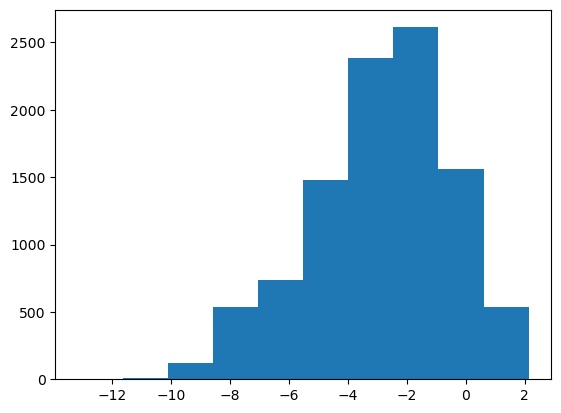

In [67]:
plt.hist(df_descriptors["LogS"])
plt.show()

In [68]:
import seaborn as sns

<Axes: ylabel='LogS'>

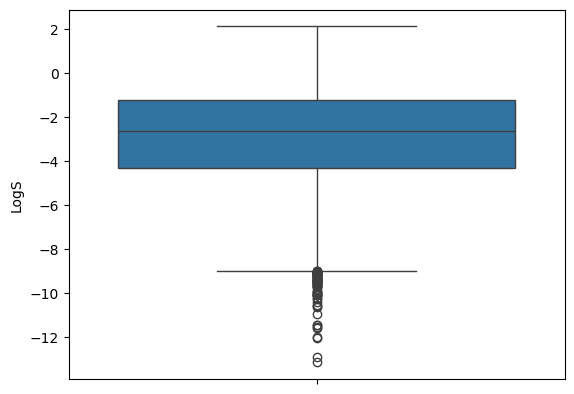

In [69]:
sns.boxplot(df_descriptors["LogS"])

In [70]:
(df_descriptors["LogS"] < -8).sum()

280

<Axes: ylabel='LogS'>

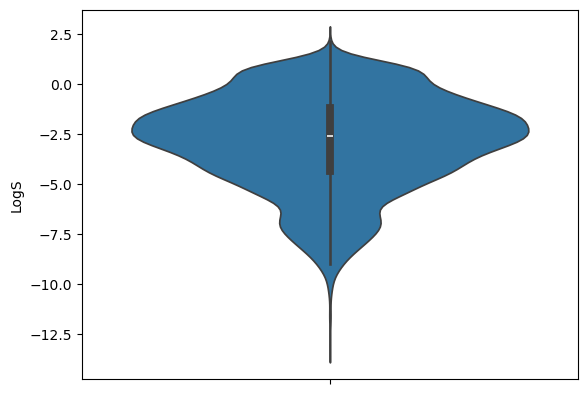

In [71]:
sns.violinplot(df_descriptors["LogS"])

In [72]:
(df_descriptors["LogS"] < -6.5).sum()

938

In [73]:
df_descriptors = df_descriptors.select_dtypes(include='number')
df_descriptors.drop(columns="LogS", inplace=True)

corr_matrix = df_descriptors.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
threshold = 0.9
to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
df_reduced = df_descriptors.drop(columns=to_drop)

In [74]:
df_reduced.describe()

,ABC,nAcid,nBase,nAromAtom,nSpiro,nBridgehead,nHetero,nB,nN,nO,...,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10,Diameter,SRW05,WPath
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,...,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9.982000e+03,9982.000000,9.982000e+03
mean,12.781209,0.371368,0.261972,6.010218,0.011521,0.056101,5.196955,0.004007,1.271789,2.810559,...,0.024463,0.013974,0.009346,0.005947,0.003892,0.002408,0.477077,1.143058e+07,0.526641,3.045333e+09
std,9.440145,0.951711,0.747701,7.209317,0.114859,0.461371,4.736275,0.114931,1.829953,2.951513,...,0.017148,0.011737,0.009093,0.006909,0.005541,0.004197,0.158190,3.181982e+07,1.085241,7.640288e+10
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,7.427747,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,...,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.402690,6.000000e+00,0.000000,1.680000e+02
50%,11.131138,0.000000,0.000000,6.000000,0.000000,0.000000,4.000000,0.000000,1.000000,2.000000,...,0.025926,0.015306,0.009896,0.000000,0.000000,0.000000,0.493201,9.000000e+00,0.000000,4.700000e+02
75%,15.768591,0.000000,0.000000,10.000000,0.000000,0.000000,6.000000,0.000000,2.000000,4.000000,...,0.033460,0.021945,0.016110,0.011625,0.008125,0.004642,0.569242,1.200000e+01,0.000000,1.297000e+03
max,286.270984,24.000000,10.000000,206.000000,3.000000,16.000000,89.000000,8.000000,32.000000,89.000000,...,0.120370,0.061224,0.059028,0.037037,0.035625,0.024793,1.250000,1.000000e+08,5.771441,7.185000e+12


In [75]:
df_reduced.head()

,ABC,nAcid,nBase,nAromAtom,nSpiro,nBridgehead,nHetero,nB,nN,nO,...,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,JGT10,Diameter,SRW05,WPath
0,15.325998,1,1,0,0,0,2,0,1,0,...,0.009804,0.007653,0.006250,0.005291,0.004615,0.004132,0.242658,100000000,0.000000,2200001716
1,10.554231,0,0,10,0,0,2,0,1,1,...,0.028500,0.000000,0.000000,0.000000,0.000000,0.000000,0.330445,5,2.397895,207
2,6.473351,0,0,6,0,0,2,0,0,1,...,0.059028,0.000000,0.000000,0.000000,0.000000,0.000000,0.475391,6,0.000000,90
3,40.125716,2,0,36,0,0,7,0,0,6,...,0.031504,0.020796,0.015079,0.008989,0.006949,0.002041,0.419640,100000000,0.000000,72800003204
4,25.374964,0,0,12,0,0,6,0,2,4,...,0.019109,0.008483,0.020107,0.003025,0.005865,0.004940,0.361975,16,5.081404,3248


In [80]:
df_reduced = pd.concat([df,df_reduced],axis=1)

In [81]:
df_reduced.shape

(9982, 303)

In [82]:
df_reduced.to_csv("./data/AqSolDB_Standardized_Mordred_Reduced.csv")